In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
objects_education = gpd.read_file('data/objects_education.geojson')

In [3]:
data = objects_education
data.head(3)

,id,name,city,street,house,post,x,y,geometry
0,224,Северный (Арктический) федеральный университет...,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,39.780599,64.557914,POINT (4428356.041 9492875.908)
1,275,Средняя школа №23 им. А.С. Пушкина,Архангельск,Федота Шубина,7 к1,163001,40.525761,64.557264,POINT (4511307.126 9492707.399)
2,1874,Архангельский областной институт открытого обр...,Архангельск,Ломоносова проспект,270,163001,40.535336,64.559314,POINT (4512372.960 9493238.741)


In [4]:
data.crs.name

'WGS 84 / Pseudo-Mercator'

In [5]:
data = data.to_crs('WGS84')

In [6]:
data.crs.name

'WGS 84'

In [7]:
data.head(3)

,id,name,city,street,house,post,x,y,geometry
0,224,Северный (Арктический) федеральный университет...,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,39.780599,64.557914,POINT (39.78060 64.55791)
1,275,Средняя школа №23 им. А.С. Пушкина,Архангельск,Федота Шубина,7 к1,163001,40.525761,64.557264,POINT (40.52576 64.55726)
2,1874,Архангельский областной институт открытого обр...,Архангельск,Ломоносова проспект,270,163001,40.535336,64.559314,POINT (40.53534 64.55931)


<AxesSubplot:>

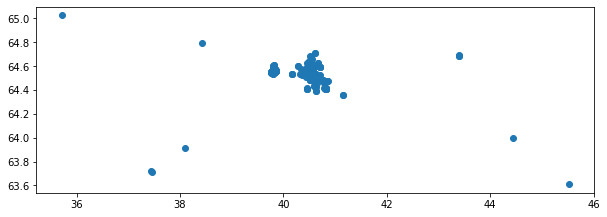

In [8]:
data.plot(figsize=(10,10))

In [9]:
data[data.id == 224]

,id,name,city,street,house,post,x,y,geometry
0,224,Северный (Арктический) федеральный университет...,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,39.780599,64.557914,POINT (39.78060 64.55791)


In [10]:
all_res = []

def convertObjectsEducationLense(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        obj = {}
        obj['id'] = objectid
        obj['name'] = row.name

        obj['city'] = row.city
        obj['street'] = row.street
        obj['house'] = row.house
        obj['post'] = row.post
        obj['coords'] = [row['y'], row['x']]

        all_res.append(obj)

data = objects_education
objectids = data.id
#objectids = [ 224 ]
for objectid in objectids:
    convertObjectsEducationLense(objectid)

objects_education_df = pd.DataFrame(all_res)
data = objects_education_df
data

,id,name,city,street,house,post,coords
0,224,0,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,"[64.55791398, 39.78059915]"
1,275,1,Архангельск,Федота Шубина,7 к1,163001,"[64.55726367, 40.52576143]"
2,1874,2,Архангельск,Ломоносова проспект,270,163001,"[64.55931417, 40.53533598]"
3,1912,3,Архангельск,Клепача,3,163039,"[64.43169736, 40.61717154]"
4,3241,4,Архангельск,Урицкого,68 к3,163060,"[64.53944863, 40.57454813]"
...,...,...,...,...,...,...,...
480,206955,480,,,,,"[63.7174921, 37.4475349]"
481,206958,481,,,,,"[63.7131966, 37.4545795]"
482,210104,482,,,,,"[64.0016939, 44.4442573]"
483,211250,483,,,,,"[65.0268243, 35.7154233]"


In [11]:
data.to_csv('data/objects_education_lense.csv', index=False)